## Import

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import numpy as np
import torch

## Graphic

In [2]:
#binary
def binary(x, error_acc):
    if x < error_acc:
        return 1
    else: return 0

def distance(x, error_acc):
    return max(0, 1-(x/error_acc))
    
def gaussian(x, sigma):
    return math.e**(-(x**2)/sigma)

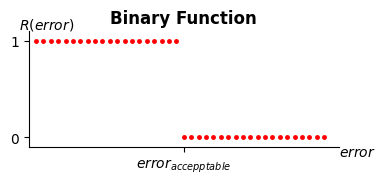

In [3]:
error_acc = 0.2
error = np.arange(0., 0.4, .01)
reward = []
for i in range(len(error)):
   reward.append(binary(error[i], error_acc))
   
fig, ax = plt.subplots(figsize=(4,1.5))
plt.plot(error,reward, c='red', ls='', ms=5)
ax = plt.gca()
ax.set_ylim([-1, 2])
ax.set_ylim(ymin=-0.1)
ax.set_ylim(ymax=1.1)
ax.set_xlim(xmin=-0.01)
ax.set_xticks([error_acc])
ax.set_xticklabels([r'$error_{accepptable}$'])
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1])
ax.set_title("Binary Function", fontweight ="bold")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.text(0.9, 0.05, r"$error$")
fig.text(0.1, 0.9, r"$R(error)$")

plt.plot(error, reward, c='red', ls='', ms=5, marker='.')
plt.show()

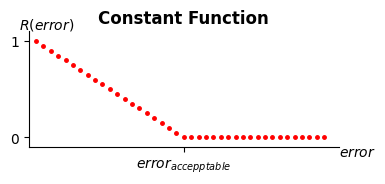

In [13]:
error_acc = 0.2
error = np.arange(0., 0.4, .01)
reward = []
for i in range(len(error)):
   reward.append(distance(error[i], error_acc))
   
fig, ax = plt.subplots(figsize=(4,1.5))
plt.plot(error,reward, c='red', ls='', ms=5)
ax = plt.gca()
ax.set_ylim([-1, 2])
ax.set_ylim(ymin=-0.1)
ax.set_ylim(ymax=1.1)
ax.set_xlim(xmin=-0.01)
ax.set_xticks([error_acc])
ax.set_xticklabels([r'$error_{accepptable}$'])
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1])
ax.set_title("Constant Function", fontweight ="bold")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.text(0.9, 0.05, r"$error$")
fig.text(0.1, 0.9, r"$R(error)$")

plt.plot(error, reward, c='red', ls='', ms=5, marker='.')
plt.show()

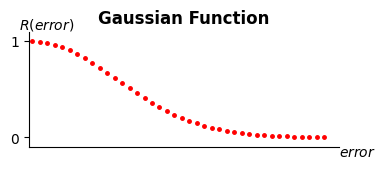

In [16]:
sigma = 0.1
error = np.arange(0., 0.8, .02)
reward = []
for i in range(len(error)):
   reward.append(gaussian(error[i],sigma))
   
fig, ax = plt.subplots(figsize=(4,1.5))
plt.plot(error,reward, c='red', ls='', ms=5)
ax = plt.gca()
ax.set_ylim([-1, 2])
ax.set_ylim(ymin=-0.1)
ax.set_ylim(ymax=1.1)
ax.set_xlim(xmin=-0.01)
ax.set_xticks([])
# ax.set_xticklabels([r'$error_{accepptable}$'])
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1])
ax.set_title("Gaussian Function", fontweight ="bold")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.text(0.9, 0.05, r"$error$")
fig.text(0.1, 0.9, r"$R(error)$")

plt.plot(error, reward, c='red', ls='', ms=5, marker='.')
plt.show()

## Define needed function

In [4]:
def read_pkl(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
        f.close()
    return obj

# Ex1

## Load and Define Needed Variables

In [49]:
list_experiment_name = ['ex1_binary', 'ex1_progress', 'ex1_gaussian']
root_dir = '/home/natcha/github/legged_project/logs/anymal_c_box/'

list_folder_dir = []
for i in list_experiment_name:
    name_folder = [f+'/' for f in os.listdir(root_dir) if i in f]
    folder_dir = root_dir+name_folder[-1]
    list_folder_dir.append(folder_dir)

    print(folder_dir)

/home/natcha/github/legged_project/logs/anymal_c_box/Jan03_13-20-09_ex1_binary/
/home/natcha/github/legged_project/logs/anymal_c_box/Jan03_13-08-34_ex1_progress/
/home/natcha/github/legged_project/logs/anymal_c_box/Jan03_12-56-30_ex1_gaussian/


In [50]:
dict_reward_log = {}
dict_state_log = {}
for i, n in enumerate(list_experiment_name):
    reward_log_path = list_folder_dir[i]+'training_log.pkl'
    reward_log = read_pkl(reward_log_path)
    dict_reward_log[n] = reward_log
    
    log_path = list_folder_dir[i]+'state_log.pkl'
    log = read_pkl(log_path)
    dict_state_log[n] = log
    
iteration = reward_log['iteration'][-1]
dt = log['dt'][0]
num_samples = log['num_samples'][0]

In [52]:
buffer_gaussian_log = dict_state_log['ex1_gaussian']

## Reward

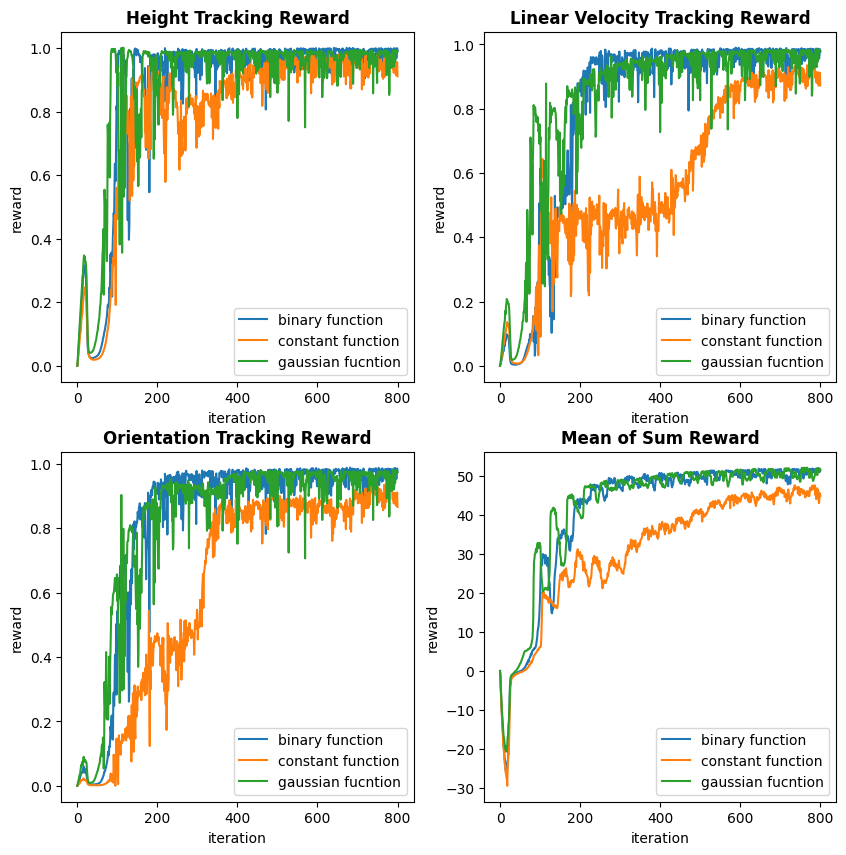

In [43]:
nb_rows = 2
nb_cols = 2
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 10))

ite = np.linspace(0, int(iteration), int(iteration+1))

a = axs[0, 0]
if dict_reward_log['ex1_binary']['tracking_height']: a.plot(ite, dict_reward_log['ex1_binary']['tracking_height'], label='binary function')
if dict_reward_log['ex1_progress']['tracking_height']: a.plot(ite, dict_reward_log['ex1_progress']['tracking_height'], label='constant function')
if dict_reward_log['ex1_gaussian']['tracking_height']: a.plot(ite, dict_reward_log['ex1_gaussian']['tracking_height'], label='gaussian fucntion')
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Height Tracking Reward', fontweight ="bold")
a.legend()

a = axs[0, 1]
if dict_reward_log['ex1_binary']['tracking_lin_vel']: a.plot(ite, dict_reward_log['ex1_binary']['tracking_lin_vel'], label='binary function')
if dict_reward_log['ex1_progress']['tracking_lin_vel']: a.plot(ite, dict_reward_log['ex1_progress']['tracking_lin_vel'], label='constant function')
if dict_reward_log['ex1_gaussian']['tracking_lin_vel']: a.plot(ite, dict_reward_log['ex1_gaussian']['tracking_lin_vel'], label='gaussian fucntion')
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Linear Velocity Tracking Reward',fontweight ="bold")
a.legend()

a = axs[1, 0]
if dict_reward_log['ex1_binary']['tracking_orientation']: a.plot(ite, dict_reward_log['ex1_binary']['tracking_orientation'], label='binary function')
if dict_reward_log['ex1_progress']['tracking_orientation']: a.plot(ite, dict_reward_log['ex1_progress']['tracking_orientation'], label='constant function')
if dict_reward_log['ex1_gaussian']['tracking_orientation']: a.plot(ite, dict_reward_log['ex1_gaussian']['tracking_orientation'], label='gaussian fucntion')
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Orientation Tracking Reward', fontweight ="bold")
a.legend()

a = axs[1, 1]
if dict_reward_log['ex1_binary']['sum_reward']: a.plot(ite, dict_reward_log['ex1_binary']['sum_reward'], label='binary function')
if dict_reward_log['ex1_progress']['sum_reward']: a.plot(ite, dict_reward_log['ex1_progress']['sum_reward'], label='constant function')
if dict_reward_log['ex1_gaussian']['sum_reward']: a.plot(ite, dict_reward_log['ex1_gaussian']['sum_reward'], label='gaussian fucntion')
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Mean of Sum Reward', fontweight ="bold")
a.legend()

plt.show()

### Commands Tracking

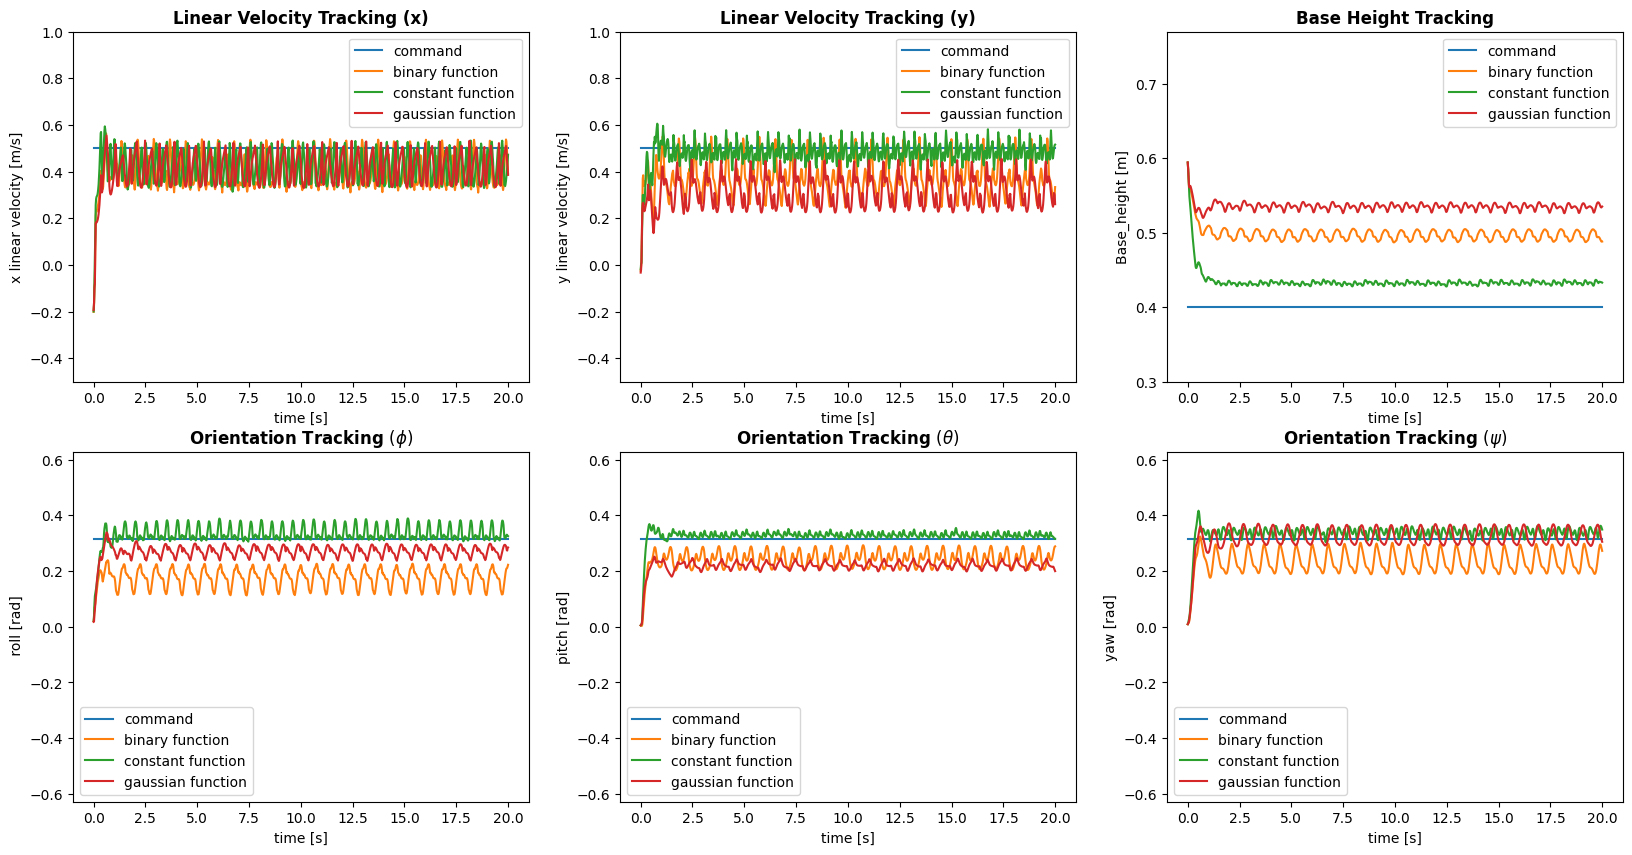

In [51]:
nb_rows = 2
nb_cols = 3
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(20, 10))

time = np.linspace(0, dt*num_samples, len(log['base_vel_x']))

a = axs[0, 0]
if dict_state_log['ex1_binary']["command_lin_x"]: a.plot(time, dict_state_log['ex1_binary']["command_lin_x"], label='command')
if dict_state_log['ex1_binary']['base_vel_x']: a.plot(time, dict_state_log['ex1_binary']['base_vel_x'], label='binary function')
if dict_state_log['ex1_progress']["base_vel_x"]: a.plot(time, dict_state_log['ex1_progress']["base_vel_x"], label='constant function')
if dict_state_log['ex1_gaussian']["base_vel_x"]: a.plot(time, dict_state_log['ex1_gaussian']["base_vel_x"], label='gaussian function')
a.set(xlabel='time [s]', ylabel='x linear velocity [m/s]')
a.set_title('Linear Velocity Tracking (x)', fontweight ="bold")
a.set_ylim(ymin=-0.5, ymax=1)
a.legend()

a = axs[0, 1]
if dict_state_log['ex1_binary']["command_lin_y"]: a.plot(time, dict_state_log['ex1_binary']["command_lin_y"], label='command')
if dict_state_log['ex1_binary']['base_vel_y']: a.plot(time, dict_state_log['ex1_binary']['base_vel_y'], label='binary function')
if dict_state_log['ex1_progress']["base_vel_y"]: a.plot(time, dict_state_log['ex1_progress']["base_vel_y"], label='constant function')
if dict_state_log['ex1_gaussian']["base_vel_y"]: a.plot(time, dict_state_log['ex1_gaussian']["base_vel_y"], label='gaussian function')
a.set(xlabel='time [s]', ylabel='y linear velocity [m/s]')
a.set_title('Linear Velocity Tracking (y)', fontweight ="bold")
a.set_ylim(ymin=-0.5, ymax=1)
a.legend()

a = axs[0, 2]
if dict_state_log['ex1_binary']["command_height"]: a.plot(time, dict_state_log['ex1_binary']["command_height"], label='command')
if dict_state_log['ex1_binary']['base_pos_x']: a.plot(time, dict_state_log['ex1_binary']['base_pos_x'], label='binary function')
if dict_state_log['ex1_progress']["base_pos_x"]: a.plot(time, dict_state_log['ex1_progress']["base_pos_x"], label='constant function')
if dict_state_log['ex1_gaussian']["base_pos_x"]: a.plot(time, dict_state_log['ex1_gaussian']["base_pos_x"], label='gaussian function')
a.set(xlabel='time [s]', ylabel='Base_height [m]')
a.set_title('Base Height Tracking', fontweight ="bold")
a.set_ylim(ymin=0.3, ymax=0.77)
a.legend()

a = axs[1, 0]
if dict_state_log['ex1_binary']["command_roll"]: a.plot(time, dict_state_log['ex1_binary']["command_roll"], label='command')
if dict_state_log['ex1_binary']['base_roll']: a.plot(time, dict_state_log['ex1_binary']['base_roll'], label='binary function')
if dict_state_log['ex1_progress']["base_roll"]: a.plot(time, dict_state_log['ex1_progress']["base_roll"], label='constant function')
if dict_state_log['ex1_gaussian']["base_roll"]: a.plot(time, dict_state_log['ex1_gaussian']["base_roll"], label='gaussian function')
a.set(xlabel='time [s]', ylabel=' roll [rad]')
a.set_title('Orientation Tracking'+r' $(\phi)$', fontweight ="bold")
a.set_ylim(ymin=-0.2*math.pi, ymax=0.2*math.pi)
a.legend()

a = axs[1, 1]
if dict_state_log['ex1_binary']["command_pitch"]: a.plot(time, dict_state_log['ex1_binary']["command_pitch"], label='command')
if dict_state_log['ex1_binary']['base_pitch']: a.plot(time, dict_state_log['ex1_binary']['base_pitch'], label='binary function')
if dict_state_log['ex1_progress']["base_pitch"]: a.plot(time, dict_state_log['ex1_progress']["base_pitch"], label='constant function')
if dict_state_log['ex1_gaussian']["base_pitch"]: a.plot(time, dict_state_log['ex1_gaussian']["base_pitch"], label='gaussian function')
a.set(xlabel='time [s]', ylabel='pitch [rad]')
a.set_title('Orientation Tracking'+r' $(\theta)$', fontweight ="bold")
a.set_ylim(ymin=-0.2*math.pi, ymax=0.2*math.pi)
a.legend()

a = axs[1, 2]
if dict_state_log['ex1_binary']["command_yaw"]: a.plot(time, dict_state_log['ex1_binary']["command_yaw"], label='command')
if dict_state_log['ex1_binary']['base_yaw']: a.plot(time, dict_state_log['ex1_binary']['base_yaw'], label='binary function')
if dict_state_log['ex1_progress']["base_yaw"]: a.plot(time, dict_state_log['ex1_progress']["base_yaw"], label='constant function')
if dict_state_log['ex1_gaussian']["base_yaw"]: a.plot(time, dict_state_log['ex1_gaussian']["base_yaw"], label='gaussian function')
a.set(xlabel='time [s]', ylabel='yaw [rad]')
a.set_title('Orientation Tracking'+r' $(\psi)$', fontweight ="bold")
a.set_ylim(ymin=-0.2*math.pi, ymax=0.2*math.pi)
a.legend()

plt.show()

### Robot Joint State

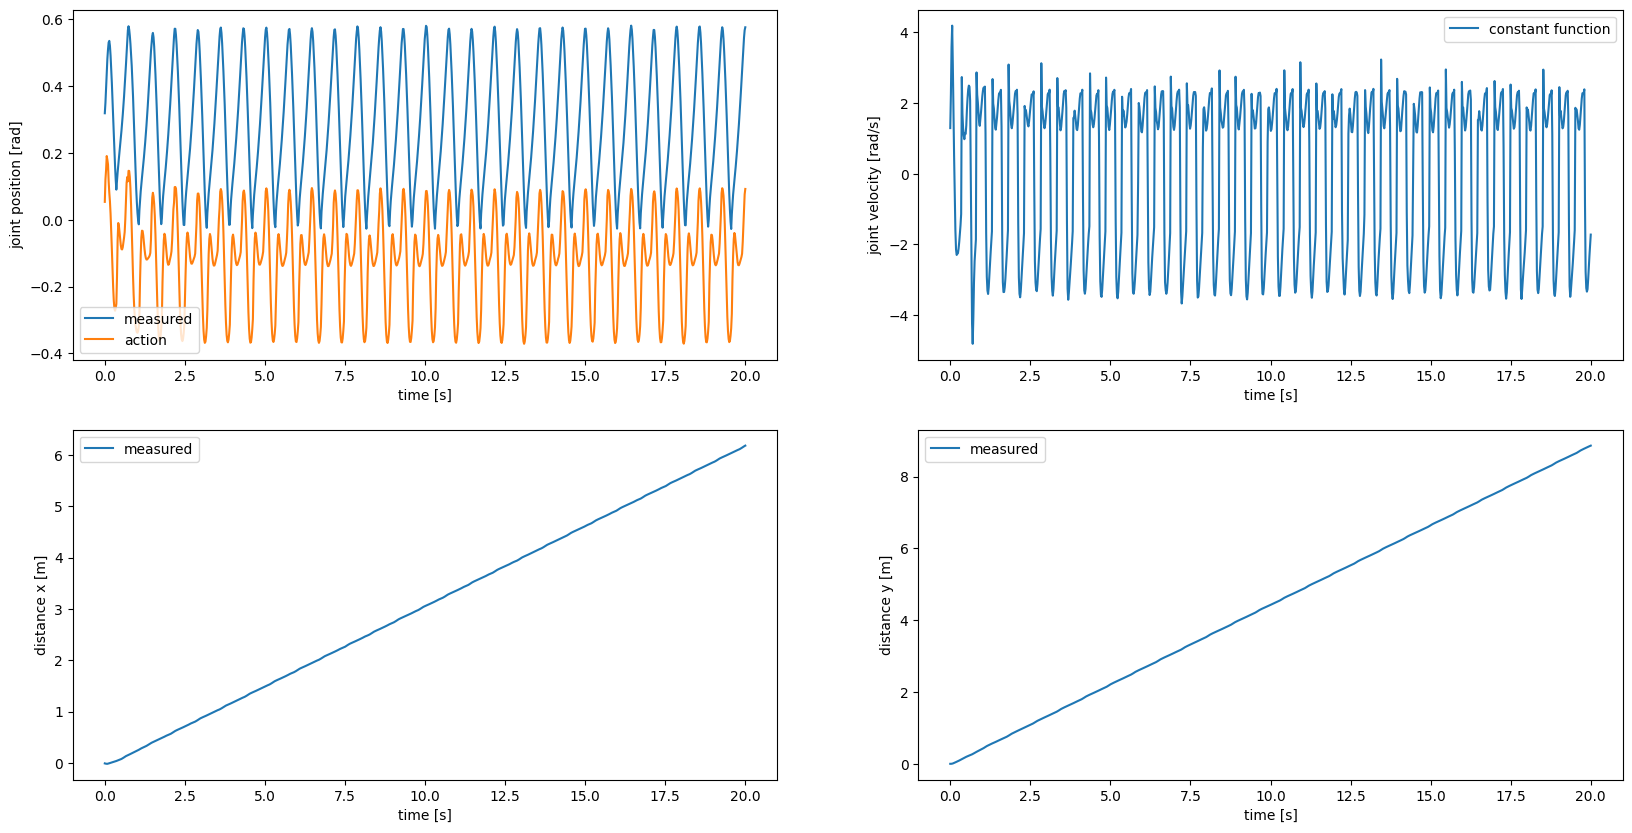

In [41]:
nb_rows = 2
nb_cols = 2
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(20, 10))

time = np.linspace(0, dt*num_samples, len(log['base_vel_x']))

a = axs[0, 0]
if  dict_state_log['ex1_gaussian']['dof_pos']: a.plot(time,  dict_state_log['ex1_gaussian']['dof_pos'], label='measured')
if  dict_state_log['ex1_gaussian']["dof_pos_target"]: a.plot(time,  dict_state_log['ex1_gaussian']["dof_pos_target"], label='action')
a.set(xlabel='time [s]', ylabel='joint position [rad]', title='')
a.legend()

a = axs[0, 1]
# if  dict_state_log['ex1_binary']['dof_vel']: a.plot(time,  dict_state_log['ex1_binary']['dof_vel'], label='binary function')
if  dict_state_log['ex1_progress']['dof_vel']: a.plot(time,  dict_state_log['ex1_progress']['dof_vel'], label='constant function')
# if  dict_state_log['ex1_gaussian']['dof_vel']: a.plot(time,  dict_state_log['ex1_gaussian']['dof_vel'], label='gaussian function')
a.set(xlabel='time [s]', ylabel='joint velocity [rad/s]', title='')
a.legend()

a = axs[1, 0]
if  dict_state_log['ex1_binary']['distance_x']: a.plot(time,  dict_state_log['ex1_binary']['distance_x'], label='measured')
a.set(xlabel='time [s]', ylabel='distance x [m]', title='')
a.legend()

a = axs[1, 1]
if  dict_state_log['ex1_binary']['distance_y']: a.plot(time,  dict_state_log['ex1_binary']['distance_y'], label='measured')
a.set(xlabel='time [s]', ylabel='distance y [m]', title='')
a.legend()

plt.show()

### Gait Analysis

[Text(0, 1.5, 'RH'),
 Text(0, 2.5, 'RF'),
 Text(0, 3.5, 'LF'),
 Text(0, 4.5, 'LH')]

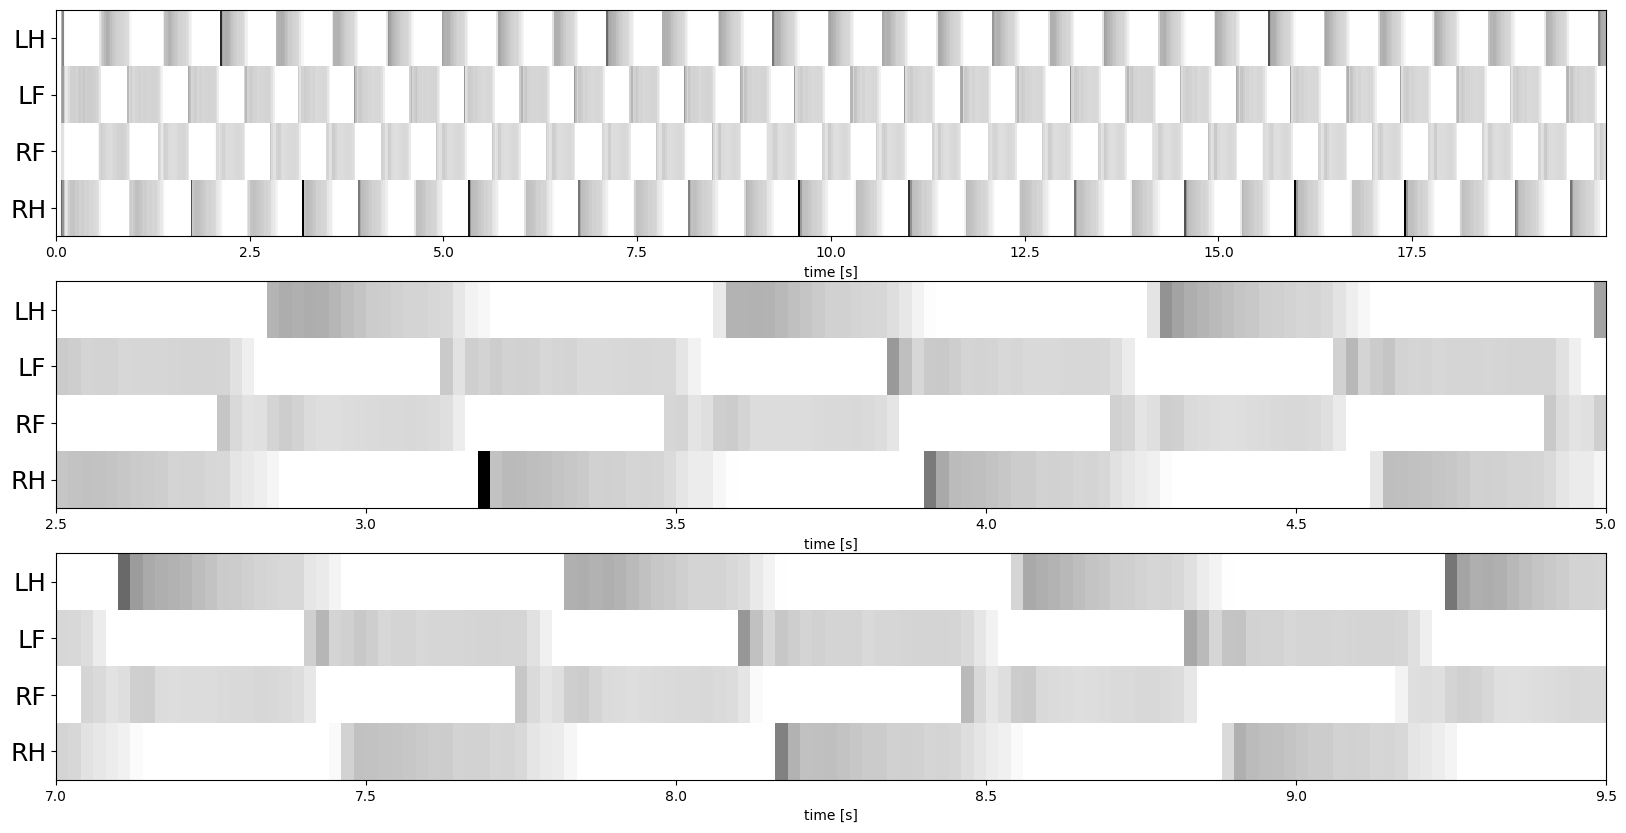

In [28]:
nb_rows = 3
nb_cols = 1
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(20, 10))

time = np.linspace(0, dt*num_samples, len(dict_state_log['ex1_gaussian']['base_vel_x'])+1)
y, x = np.meshgrid(np.array([1, 2, 3, 4, 5]), time)
z = np.array(dict_state_log['ex1_gaussian']['contact_forces_z'])
lf = z[:, 0]
lh = z[:, 1]
rf = z[:, 2]
rh = z[:, 3]
new_z = np.array([rh, rf, lf, lh]).T
# new_z = z
z_min, z_max = np.abs(new_z).min(), np.abs(new_z).max()
# new_z = np.where(new_z < z_max*0.2, 0, z_max)

a = axs[0]
c = a.pcolormesh(x, y, new_z, cmap='Greys', vmin=z_min, vmax=z_max)
a.axis([x.min(), x.max(), y.min(), y.max()])
a.set(xlabel='time [s]')
# Set number of ticks for x-axis
a.set_yticks(np.arange(1.5,5,1))
# Set ticks labels for x-axis
a.set_yticklabels(['RH', 'RF', 'LF', 'LH'], fontsize=18)

# crop
a = axs[1]
start = 2.5
stop = 5
time = np.linspace(start, stop, int((stop-start)/dt)+1)
y, x = np.meshgrid(np.array([1, 2, 3, 4, 5]), time)
z_crop1 = new_z[int(start/dt):int(stop/dt), :]
c = a.pcolormesh(x, y, z_crop1, cmap='Greys', vmin=z_min, vmax=z_max)
a.axis([x.min(), x.max(), y.min(), y.max()])
a.set(xlabel='time [s]')
# Set number of ticks for x-axis
a.set_yticks(np.arange(1.5,5,1))
# Set ticks labels for x-axis
a.set_yticklabels(['RH', 'RF', 'LF', 'LH'], fontsize=18)

# crop2
a = axs[2]
start = 7
stop = 9.5
time = np.linspace(start, stop, int((stop-start)/dt)+1)
y, x = np.meshgrid(np.array([1, 2, 3, 4, 5]), time)
z_crop2 = new_z[int(start/dt):int(stop/dt), :]
c = a.pcolormesh(x, y, z_crop2, cmap='Greys', vmin=z_min, vmax=z_max)
a.axis([x.min(), x.max(), y.min(), y.max()])
a.set(xlabel='time [s]')
# Set number of ticks for x-axis
a.set_yticks(np.arange(1.5,5,1))
# Set ticks labels for x-axis
a.set_yticklabels(['RH', 'RF', 'LF', 'LH'], fontsize=18)

# LF[0] LH[1] RF[2] RH[3]
# RH[3] RF[2] LF[0] LH[1]

# Ex2

In [57]:
list_experiment_name = ['ex2_no', 'ex2_curriculum', 'ex1_gaussian']
root_dir = '/home/natcha/github/legged_project/logs/anymal_c_box/'

list_folder_dir = []
for i in list_experiment_name:
    name_folder = [f+'/' for f in os.listdir(root_dir) if i in f]
    folder_dir = root_dir+name_folder[-1]
    list_folder_dir.append(folder_dir)

    print(folder_dir)

/home/natcha/github/legged_project/logs/anymal_c_box/Jan03_13-57-59_ex2_no/
/home/natcha/github/legged_project/logs/anymal_c_box/Jan03_15-17-17_ex2_curriculum/
/home/natcha/github/legged_project/logs/anymal_c_box/Jan03_12-56-30_ex1_gaussian/


In [58]:
dict_reward_log = {}
dict_state_log = {}
for i, n in enumerate(list_experiment_name):
    reward_log_path = list_folder_dir[i]+'training_log.pkl'
    reward_log = read_pkl(reward_log_path)
    dict_reward_log[n] = reward_log
    
    log_path = list_folder_dir[i]+'state_log.pkl'
    log = read_pkl(log_path)
    dict_state_log[n] = log
    
iteration = reward_log['iteration'][-1]
dt = log['dt'][0]
num_samples = log['num_samples'][0]

In [36]:
velocity = np.array(dict_reward_log['ex2_curriculum']["command_level"]).T[0]
height = np.array(dict_reward_log['ex2_curriculum']["command_level"]).T[1]
orien = np.array(dict_reward_log['ex2_curriculum']["command_level"]).T[2]

velocity_list = []
height_list = []
orien_list = []
for i in range(len(velocity)-1):
    if velocity[i] != velocity[i+1]:
        velocity_list.append(i+1)
    if height[i] != height[i+1]:
        height_list.append(i+1)
    if orien[i] != orien[i+1]:
        orien_list.append(i+1)

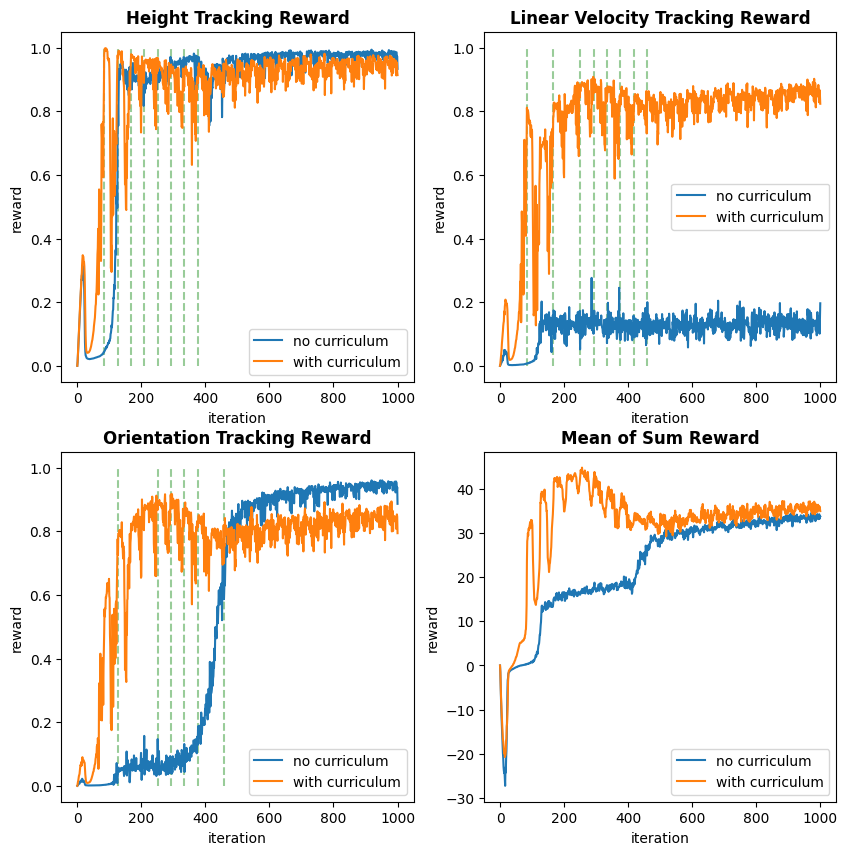

In [37]:
nb_rows = 2
nb_cols = 2
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 10))

ite = np.linspace(0, int(iteration), int(iteration+1))

a1 = axs[0, 0]
a1.vlines(x=height_list, ymin=0, ymax=1, linestyles ="dashed", colors ="g", alpha=0.4)
if dict_reward_log['ex2_no']['tracking_height']: a1.plot(ite, dict_reward_log['ex2_no']['tracking_height'], label='no curriculum')
if dict_reward_log['ex2_curriculum']['tracking_height']: a1.plot(ite, dict_reward_log['ex2_curriculum']['tracking_height'], label='with curriculum')
a1.set(xlabel='iteration', ylabel='reward')
a1.set_title('Height Tracking Reward', fontweight ="bold")
a1.legend()

a = axs[0, 1]
a.vlines(x=velocity_list, ymin=0, ymax=1, linestyles ="dashed", colors ="g", alpha=0.4)
if dict_reward_log['ex2_no']['tracking_lin_vel']: a.plot(ite, dict_reward_log['ex2_no']['tracking_lin_vel'], label='no curriculum')
if dict_reward_log['ex2_curriculum']['tracking_lin_vel']: a.plot(ite, dict_reward_log['ex2_curriculum']['tracking_lin_vel'], label='with curriculum')
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Linear Velocity Tracking Reward',fontweight ="bold")
a.legend()

a = axs[1, 0]
a.vlines(x=orien_list, ymin=0, ymax=1, linestyles ="dashed", colors ="g", alpha=0.4)
if dict_reward_log['ex2_no']['tracking_orientation']: a.plot(ite, dict_reward_log['ex2_no']['tracking_orientation'], label='no curriculum')
if dict_reward_log['ex2_curriculum']['tracking_orientation']: a.plot(ite, dict_reward_log['ex2_curriculum']['tracking_orientation'], label='with curriculum')
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Orientation Tracking Reward', fontweight ="bold")
a.legend()

a = axs[1, 1]
if dict_reward_log['ex2_no']['sum_reward']: a.plot(ite, dict_reward_log['ex2_no']['sum_reward'], label='no curriculum')
if dict_reward_log['ex2_curriculum']['sum_reward']: a.plot(ite, dict_reward_log['ex2_curriculum']['sum_reward'], label='with curriculum')
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Mean of Sum Reward', fontweight ="bold")
a.legend()

plt.show()

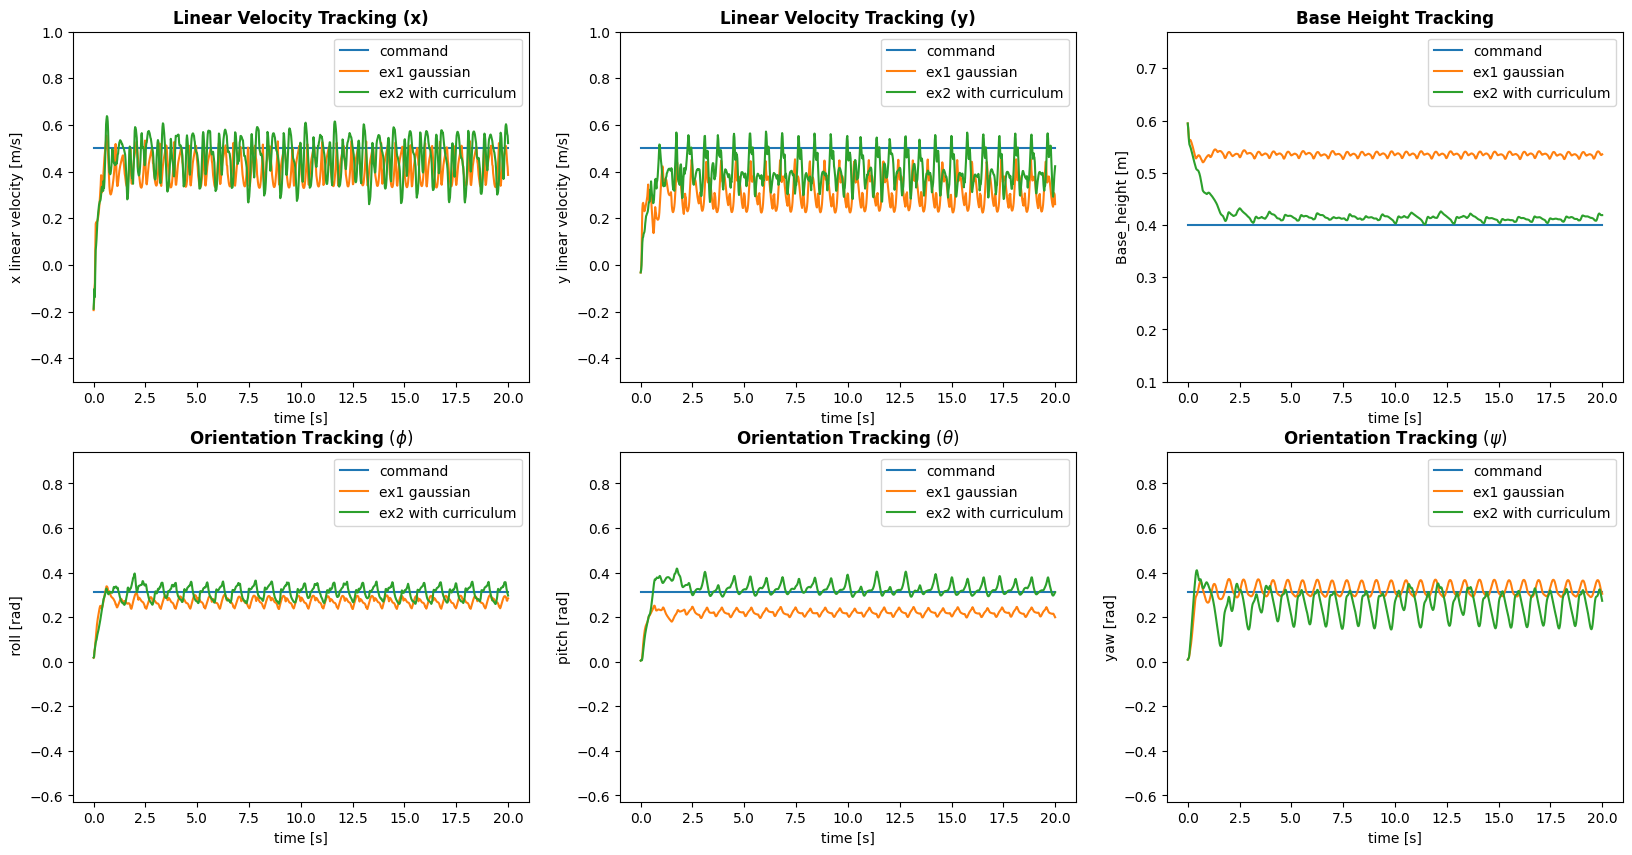

In [62]:
nb_rows = 2
nb_cols = 3
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(20, 10))

time = np.linspace(0, dt*num_samples, len(log['base_vel_x']))

a = axs[0, 0]
if dict_state_log['ex2_curriculum']["command_lin_x"]: a.plot(time, dict_state_log['ex2_curriculum']["command_lin_x"], label='command')
if dict_state_log['ex1_gaussian']["base_vel_x"]: a.plot(time, dict_state_log['ex1_gaussian']["base_vel_x"], label='ex1 gaussian')
if dict_state_log['ex2_curriculum']["base_vel_x"]: a.plot(time, dict_state_log['ex2_curriculum']["base_vel_x"], label='ex2 with curriculum')
a.set(xlabel='time [s]', ylabel='x linear velocity [m/s]')
a.set_title('Linear Velocity Tracking (x)', fontweight ="bold")
a.set_ylim(ymin=-0.5, ymax=1)
a.legend()

a = axs[0, 1]
if dict_state_log['ex2_curriculum']["command_lin_y"]: a.plot(time, dict_state_log['ex2_curriculum']["command_lin_y"], label='command')
if dict_state_log['ex1_gaussian']["base_vel_y"]: a.plot(time, dict_state_log['ex1_gaussian']["base_vel_y"], label='ex1 gaussian')
if dict_state_log['ex2_curriculum']["base_vel_y"]: a.plot(time, dict_state_log['ex2_curriculum']["base_vel_y"], label='ex2 with curriculum')
a.set(xlabel='time [s]', ylabel='y linear velocity [m/s]')
a.set_title('Linear Velocity Tracking (y)', fontweight ="bold")
a.set_ylim(ymin=-0.5, ymax=1)
a.legend()

a = axs[0, 2]
if dict_state_log['ex2_curriculum']["command_height"]: a.plot(time, dict_state_log['ex2_curriculum']["command_height"], label='command')
if dict_state_log['ex1_gaussian']["base_pos_x"]: a.plot(time, dict_state_log['ex1_gaussian']["base_pos_x"], label='ex1 gaussian')
if dict_state_log['ex2_curriculum']["base_pos_x"]: a.plot(time, dict_state_log['ex2_curriculum']["base_pos_x"], label='ex2 with curriculum')
a.set(xlabel='time [s]', ylabel='Base_height [m]')
a.set_title('Base Height Tracking', fontweight ="bold")
a.set_ylim(ymin=0.1, ymax=0.77)
a.legend()

a = axs[1, 0]
if dict_state_log['ex2_curriculum']["command_roll"]: a.plot(time, dict_state_log['ex2_curriculum']["command_roll"], label='command')
if dict_state_log['ex1_gaussian']["base_roll"]: a.plot(time, dict_state_log['ex1_gaussian']["base_roll"], label='ex1 gaussian')
if dict_state_log['ex2_curriculum']["base_roll"]: a.plot(time, dict_state_log['ex2_curriculum']["base_roll"], label='ex2 with curriculum')
a.set(xlabel='time [s]', ylabel=' roll [rad]')
a.set_title('Orientation Tracking'+r' $(\phi)$', fontweight ="bold")
a.set_ylim(ymin=-0.2*math.pi, ymax=0.3*math.pi)
a.legend()

a = axs[1, 1]
if dict_state_log['ex2_curriculum']["command_pitch"]: a.plot(time, dict_state_log['ex2_curriculum']["command_pitch"], label='command')
if dict_state_log['ex1_gaussian']["base_pitch"]: a.plot(time, dict_state_log['ex1_gaussian']["base_pitch"], label='ex1 gaussian')
if dict_state_log['ex2_curriculum']["base_pitch"]: a.plot(time, dict_state_log['ex2_curriculum']["base_pitch"], label='ex2 with curriculum')
a.set(xlabel='time [s]', ylabel='pitch [rad]')
a.set_title('Orientation Tracking'+r' $(\theta)$', fontweight ="bold")
a.set_ylim(ymin=-0.2*math.pi, ymax=0.3*math.pi)
a.legend()

a = axs[1, 2]
if dict_state_log['ex2_curriculum']["command_yaw"]: a.plot(time, dict_state_log['ex2_curriculum']["command_yaw"], label='command')
if dict_state_log['ex1_gaussian']["base_yaw"]: a.plot(time, dict_state_log['ex1_gaussian']["base_yaw"], label='ex1 gaussian')
if dict_state_log['ex2_curriculum']["base_yaw"]: a.plot(time, dict_state_log['ex2_curriculum']["base_yaw"], label='ex2 with curriculum')
a.set(xlabel='time [s]', ylabel='yaw [rad]')
a.set_title('Orientation Tracking'+r' $(\psi)$', fontweight ="bold")
a.set_ylim(ymin=-0.2*math.pi, ymax=0.3*math.pi)
a.legend()

plt.show()

# Ex3

In [132]:
list_experiment_name = ['ex3_pretrain','ex3_resume3']
root_dir = '/home/natcha/github/legged_project/logs/anymal_c_box/'

list_folder_dir = []
for i in list_experiment_name:
    name_folder = [f+'/' for f in os.listdir(root_dir) if i in f]
    folder_dir = root_dir+name_folder[-1]
    list_folder_dir.append(folder_dir)

    print(folder_dir)

/home/natcha/github/legged_project/logs/anymal_c_box/Jan04_13-30-41_ex3_pretrain/
/home/natcha/github/legged_project/logs/anymal_c_box/Jan04_16-05-00_ex3_resume3/


In [133]:
dict_reward_log = {}
dict_state_log = {}
for i, n in enumerate(list_experiment_name):
    reward_log_path = list_folder_dir[i]+'training_log.pkl'
    reward_log = read_pkl(reward_log_path)
    dict_reward_log[n] = reward_log
    
    # log_path = list_folder_dir[i]+'state_log.pkl'
    # log = read_pkl(log_path)
    # dict_state_log[n] = log
    
iteration = reward_log['iteration'][-1]
# dt = log['dt'][0]
# num_samples = log['num_samples'][0]

In [99]:
dict_reward_log['ex3_resume3']['tracking_height'] = dict_reward_log['ex3_pretrain']['tracking_height'] + dict_reward_log['ex3_resume3']['tracking_height'][30:]
dict_reward_log['ex3_resume3']['tracking_lin_vel'] = dict_reward_log['ex3_pretrain']['tracking_lin_vel'] + dict_reward_log['ex3_resume3']['tracking_lin_vel'][30:]
dict_reward_log['ex3_resume3']['tracking_orientation'] = dict_reward_log['ex3_pretrain']['tracking_orientation'] + dict_reward_log['ex3_resume3']['tracking_orientation'][30:]
dict_reward_log['ex3_resume3']['sum_reward'] = dict_reward_log['ex3_pretrain']['sum_reward'] + dict_reward_log['ex3_resume3']['sum_reward'][30:]

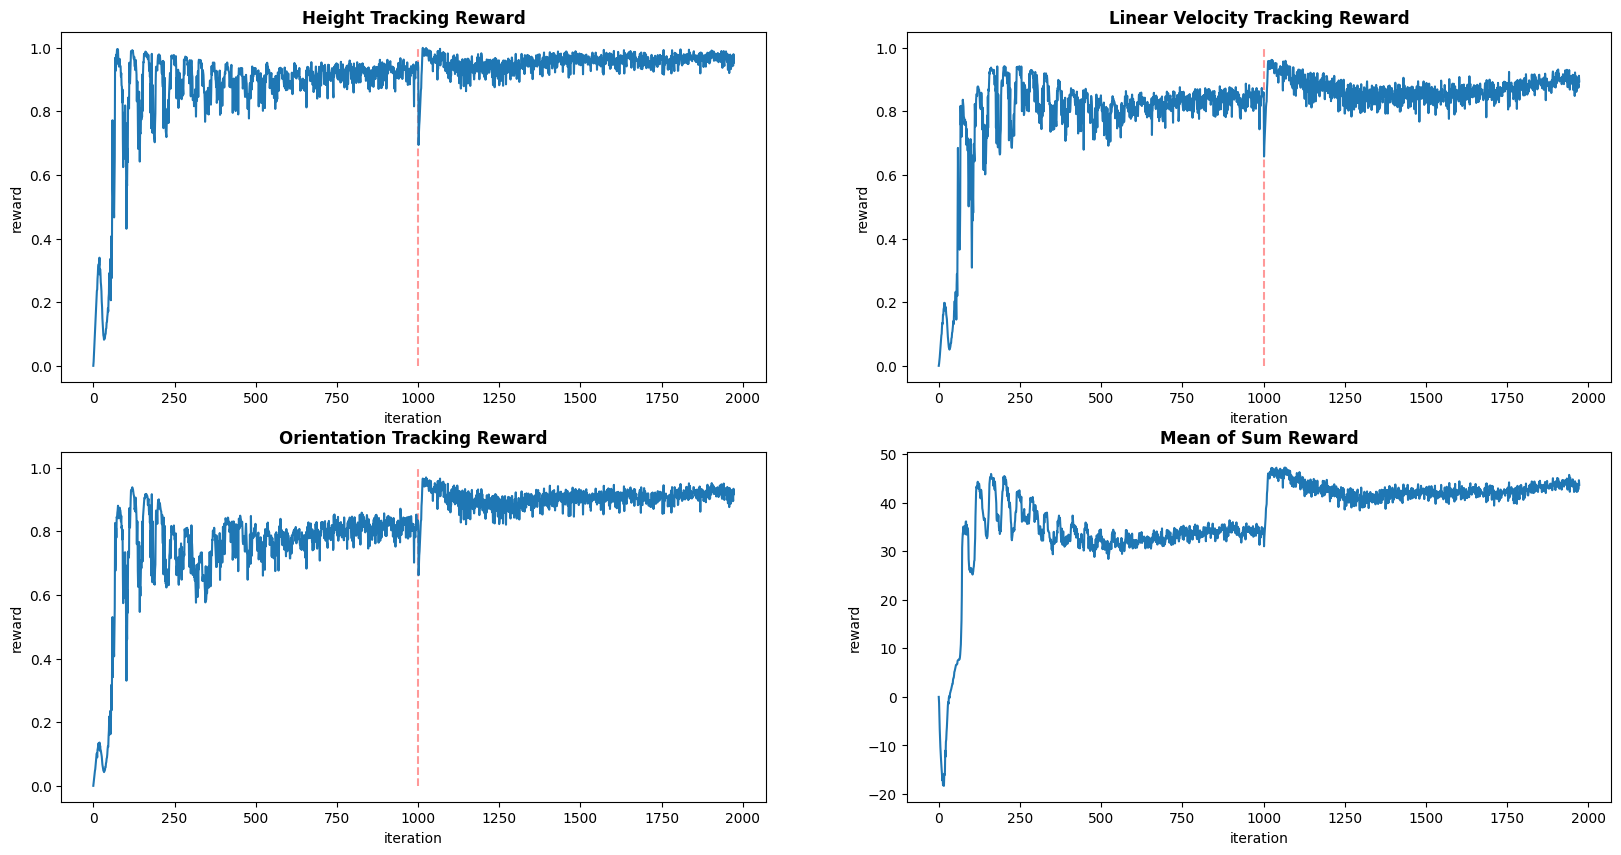

In [121]:
nb_rows = 2
nb_cols = 2
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(20, 10))

ite = np.linspace(0, len(dict_reward_log['ex3_resume3']['tracking_height']), len(dict_reward_log['ex3_resume3']['tracking_height']))

a1 = axs[0, 0]
a1.vlines(x=1000, ymin=0, ymax=1, linestyles ="dashed", colors ="r", alpha=0.4)
if dict_reward_log['ex3_resume3']['tracking_height']: a1.plot(ite, dict_reward_log['ex3_resume3']['tracking_height'])
a1.set(xlabel='iteration', ylabel='reward')
a1.set_title('Height Tracking Reward', fontweight ="bold")
# a1.legend()

a = axs[0, 1]
a.vlines(x=1000, ymin=0, ymax=1, linestyles ="dashed", colors ="r", alpha=0.4)
if dict_reward_log['ex3_resume3']['tracking_lin_vel']: a.plot(ite, dict_reward_log['ex3_resume3']['tracking_lin_vel'])
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Linear Velocity Tracking Reward',fontweight ="bold")
# a.legend()

a = axs[1, 0]
a.vlines(x=1000, ymin=0, ymax=1, linestyles ="dashed", colors ="r", alpha=0.4)
if dict_reward_log['ex3_resume3']['tracking_orientation']: a.plot(ite, dict_reward_log['ex3_resume3']['tracking_orientation'])
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Orientation Tracking Reward', fontweight ="bold")
# a.legend()

a = axs[1, 1]
# a.vlines(x=1000, ymin=0, ymax=1, linestyles ="dashed", colors ="r", alpha=0.4)
if dict_reward_log['ex3_resume3']['sum_reward']: a.plot(ite, dict_reward_log['ex3_resume3']['sum_reward'])
a.set(xlabel='iteration', ylabel='reward')
a.set_title('Mean of Sum Reward', fontweight ="bold")
# a.legend()

plt.show()

In [151]:
terrain_level = [tensor.item() for tensor in dict_reward_log['ex3_resume3']["terrain_level"]]

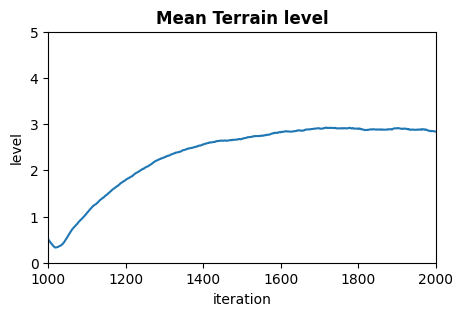

In [167]:
ite = np.linspace(1000, 1000+len(terrain_level), len(terrain_level))

plt.figure(figsize=(5, 3))
if dict_reward_log['ex3_resume3']['terrain_level']: plt.plot(ite, terrain_level)
plt.title('Mean Terrain level', fontweight ="bold")
plt.xlabel('iteration')
plt.ylabel('level')
plt.xlim(xmax=2000, xmin=1000)
plt.ylim(ymax=5, ymin=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Text(0.5, 1.0, 'Height Tracking Reward')

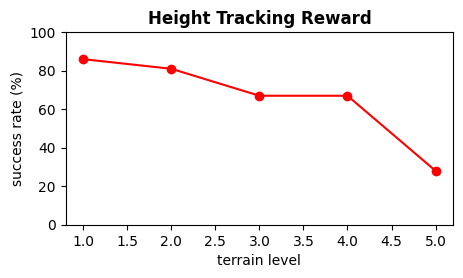

In [43]:
#reach 80% of velocity 
sucess_rate = [86, 81, 67, 67, 28]
fig, axs = plt.subplots(figsize=(5, 2.5))

ite = np.linspace(1, 5, 5)

axs.plot(ite, sucess_rate, c='red', marker='o')
axs.set(xlabel='terrain level', ylabel='success rate (%)', ylim=[0,100])
axs.set_title('Height Tracking Reward', fontweight ="bold")